In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import datetime

**QUESTION 1**

In [3]:
# Read the csv file and view a few rows
trades = pd.read_csv('/Users/haivanle/Documents/2024 Empirical/trades.csv')
trades.head()

,accession_num,order,trans_date,trans_type,price,shares,shares_owned,CIK,name,ticker
0,0001140361-23-050019,1,10/27/2023,D,NaN,5371304.0,0.0,1124105,"CATALYST BIOSCIENCES, INC.",CBIO
1,0000885550-23-000118,1,11/14/2023,D,418.04,115.0,6173.0,885550,CREDIT ACCEPTANCE CORP,CACC
2,0000885550-23-000118,2,11/14/2023,D,419.62,100.0,6073.0,885550,CREDIT ACCEPTANCE CORP,CACC
3,0000885550-23-000118,3,11/14/2023,D,420.72,2240.0,3833.0,885550,CREDIT ACCEPTANCE CORP,CACC
4,0000885550-23-000118,4,11/14/2023,D,421.38,459.0,3374.0,885550,CREDIT ACCEPTANCE CORP,CACC


In [5]:
trades.describe()

,order,price,shares,shares_owned,CIK
count,749625.000000,5.345600e+05,5.804900e+05,7.494540e+05,7.496250e+05
mean,2.483431,4.964335e+02,4.095368e+05,5.008667e+06,1.182391e+06
std,2.989637,8.493532e+04,2.320737e+07,9.526046e+07,5.510764e+05
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.750000e+03
25%,1.000000,0.000000e+00,7.680000e+02,1.188100e+04,8.670280e+05
50%,1.000000,1.164440e+01,3.460000e+03,5.757900e+04,1.315098e+06
75%,3.000000,5.358250e+01,1.692900e+04,3.154700e+05,1.642896e+06
max,30.000000,2.950000e+07,8.456000e+09,8.985000e+09,1.996862e+06


In [6]:
trades = trades.drop_duplicates()

In [8]:
trades.describe()

,order,price,shares,shares_owned,CIK
count,348271.000000,2.507070e+05,2.707650e+05,3.481880e+05,3.482710e+05
mean,2.395755,5.136221e+02,3.104011e+05,4.754228e+06,1.157756e+06
std,2.880249,8.749722e+04,2.356394e+07,9.847200e+07,5.526566e+05
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.750000e+03
25%,1.000000,0.000000e+00,7.220000e+02,1.110000e+04,8.607300e+05
50%,1.000000,1.229000e+01,3.069000e+03,5.112400e+04,1.273685e+06
75%,3.000000,5.692000e+01,1.395300e+04,2.503385e+05,1.620393e+06
max,30.000000,2.950000e+07,8.456000e+09,8.985000e+09,1.996862e+06


In [9]:
# Check types of data
trades.dtypes

accession_num     object
order              int64
trans_date        object
trans_type        object
price            float64
shares           float64
shares_owned     float64
CIK                int64
name              object
ticker            object
dtype: object

In [10]:
# Make sure trans_date is in the standard date-time format
# Filter all transactions from Jan 1 - April 30, 2023
# The data description is not correct since many of the dates are out of range eg. 2023-06-27-05:00, 
# if it's ok to drop them, we can use errors = 'coerce'. Otherwise, check and fix :)
trades['trans_date'] = pd.to_datetime(trades['trans_date'], errors = 'coerce')
trades = trades[(trades['trans_date'] >= '2023-01-01') & (trades['trans_date'] <= '2023-04-30')]

/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_90394/432466457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades['trans_date'] = pd.to_datetime(trades['trans_date'], errors = 'coerce')


In [11]:
trades

,accession_num,order,trans_date,trans_type,price,shares,shares_owned,CIK,name,ticker
10,0001467373-23-000082,1,2023-02-01,D,280.485,2.067000e+03,4.034300e+04,1467373,Accenture plc,ACN
16,0001327607-23-000025,1,2023-02-16,D,26.820,1.755000e+03,1.216000e+04,1327607,First Western Financial Inc,MYFW
20,0000899243-23-010219,1,2023-03-30,D,47.590,4.000000e+06,3.485348e+07,1915657,HF Sinclair Corp,DINO
41,0001567619-23-002199,1,2023-02-07,D,72.955,3.650000e+02,2.179300e+04,884887,ROYAL CARIBBEAN CRUISES LTD,RCL
44,0001017480-23-000034,1,2023-03-31,A,0.000,1.885000e+03,6.312000e+03,1017480,HIBBETT INC,HIBB
...,...,...,...,...,...,...,...,...,...,...
745691,0001209191-23-004312,2,2023-01-09,D,176.420,6.650000e+02,1.168500e+04,1442145,"Verisk Analytics, Inc.",VRSK
745692,0001209191-23-004312,3,2023-01-15,A,0.000,2.760000e+02,1.196100e+04,1442145,"Verisk Analytics, Inc.",VRSK
745693,0001209191-23-004312,4,2023-01-15,D,183.950,1.460000e+02,1.181500e+04,1442145,"Verisk Analytics, Inc.",VRSK
745841,0000024090-23-000101,1,2023-04-03,A,3.550,3.489731e+02,2.575235e+04,24090,"CITIZENS, INC.",CIA


In [12]:
# Create a new column that specifies net shares transaction based on D - Disposed and A - Acquired. 
# Eg, if trans_type = 'D', the net shares should be a negative number so that when we add them together, 
# it represent the right net value.
trades['net_shares'] = np.where(trades['trans_type'] == 'D', trades['shares'] * -1, trades['shares'])

/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_90394/124331872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades['net_shares'] = np.where(trades['trans_type'] == 'D', trades['shares'] * -1, trades['shares'])


In [13]:
trades

,accession_num,order,trans_date,trans_type,price,shares,shares_owned,CIK,name,ticker,net_shares
10,0001467373-23-000082,1,2023-02-01,D,280.485,2.067000e+03,4.034300e+04,1467373,Accenture plc,ACN,-2.067000e+03
16,0001327607-23-000025,1,2023-02-16,D,26.820,1.755000e+03,1.216000e+04,1327607,First Western Financial Inc,MYFW,-1.755000e+03
20,0000899243-23-010219,1,2023-03-30,D,47.590,4.000000e+06,3.485348e+07,1915657,HF Sinclair Corp,DINO,-4.000000e+06
41,0001567619-23-002199,1,2023-02-07,D,72.955,3.650000e+02,2.179300e+04,884887,ROYAL CARIBBEAN CRUISES LTD,RCL,-3.650000e+02
44,0001017480-23-000034,1,2023-03-31,A,0.000,1.885000e+03,6.312000e+03,1017480,HIBBETT INC,HIBB,1.885000e+03
...,...,...,...,...,...,...,...,...,...,...,...
745691,0001209191-23-004312,2,2023-01-09,D,176.420,6.650000e+02,1.168500e+04,1442145,"Verisk Analytics, Inc.",VRSK,-6.650000e+02
745692,0001209191-23-004312,3,2023-01-15,A,0.000,2.760000e+02,1.196100e+04,1442145,"Verisk Analytics, Inc.",VRSK,2.760000e+02
745693,0001209191-23-004312,4,2023-01-15,D,183.950,1.460000e+02,1.181500e+04,1442145,"Verisk Analytics, Inc.",VRSK,-1.460000e+02
745841,0000024090-23-000101,1,2023-04-03,A,3.550,3.489731e+02,2.575235e+04,24090,"CITIZENS, INC.",CIA,3.489731e+02


In [14]:
# Group by ticker and add up the net_shares
q1 = trades.groupby('ticker')['net_shares'].sum()
q1

ticker
 KRC       82833.1439
 RPT      152775.0000
 SCS      438688.0000
"OMEX"    -10877.0000
(CALX)    200211.0000
             ...     
nick       10643.0000
none         293.0000
ubcp       -5000.0000
vicr       19928.0000
znog      100000.0000
Name: net_shares, Length: 4417, dtype: float64

**QUESTION 2**

In [15]:
# Load necessary library
import matplotlib.pyplot as plt

In [84]:
# Read data file and view a few rows
stocks = pd.read_csv('/Users/haivanle/Documents/2024 Empirical/stocks_Jan-Nov2023.csv')
stocks.head()

/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_90394/2733191146.py:2: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.



,date,TICKER,COMNAM,PRC,VOL,RET,SHROUT
0,1/3/2023,JJSF,J & J SNACK FOODS CORP,151.48000,89954.0,0.011823,19229.0
1,1/4/2023,JJSF,J & J SNACK FOODS CORP,151.22000,52980.0,-0.001716,19229.0
2,1/5/2023,JJSF,J & J SNACK FOODS CORP,149.60001,60472.0,-0.010713,19229.0
3,1/6/2023,JJSF,J & J SNACK FOODS CORP,152.64000,57034.0,0.020321,19229.0
4,1/9/2023,JJSF,J & J SNACK FOODS CORP,149.61000,63214.0,-0.019851,19229.0


In [53]:
stocks.describe()

,PRC,VOL,SHROUT
count,1.182678e+06,1.182681e+06,1.183833e+06
mean,1.395113e+02,1.441800e+06,1.413856e+05
std,7.077325e+03,8.192930e+06,4.642921e+05
min,-1.010535e+03,0.000000e+00,1.010000e+02
25%,2.600000e+00,3.927800e+04,1.690000e+04
50%,1.065000e+01,2.298630e+05,4.403800e+04
75%,3.722000e+01,8.830710e+05,1.148520e+05
max,5.630728e+05,1.923658e+09,1.584241e+07


In [81]:
stocks = stocks.drop_duplicates()
stocks.describe()

,PRC,VOL,SHROUT
count,1.182678e+06,1.182681e+06,1.183833e+06
mean,1.395113e+02,1.441800e+06,1.413856e+05
std,7.077325e+03,8.192930e+06,4.642921e+05
min,-1.010535e+03,0.000000e+00,1.010000e+02
25%,2.600000e+00,3.927800e+04,1.690000e+04
50%,1.065000e+01,2.298630e+05,4.403800e+04
75%,3.722000e+01,8.830710e+05,1.148520e+05
max,5.630728e+05,1.923658e+09,1.584241e+07


In [91]:
stocks['date'] = pd.to_datetime(stocks['date'], errors = 'coerce')

In [94]:
# Convert stocks return from object to float type
stocks['RET'] = pd.to_numeric(stocks['RET'], errors='coerce')
stocks = stocks.dropna(subset=['RET'])

In [95]:
stocks.dtypes

date      datetime64[ns]
TICKER            object
COMNAM            object
PRC              float64
VOL              float64
RET              float64
SHROUT           float64
dtype: object

In [96]:
# Make sure date is in the standard date-time format
# Filter all dates from Feb 1 - Aug 31, 2023
stocks_pfe = stocks[(stocks['date'] >= '2023-02-01') & (stocks['date'] <= '2023-08-31')]
# Filter data for Pfizer
stocks_pfe = stocks_pfe[stocks['TICKER'] == 'PFE']
stocks_pfe

/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_90394/1172213102.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,date,TICKER,COMNAM,PRC,VOL,RET,SHROUT
322466,2023-02-01,PFE,PFIZER INC,43.97,24482321.0,-0.004303,5613315.0
322467,2023-02-02,PFE,PFIZER INC,44.34,35279247.0,0.008415,5613315.0
322468,2023-02-03,PFE,PFIZER INC,44.06,23741990.0,-0.006315,5613315.0
322469,2023-02-06,PFE,PFIZER INC,43.76,18071239.0,-0.006809,5613315.0
322470,2023-02-07,PFE,PFIZER INC,43.59,22999453.0,-0.003885,5613315.0
...,...,...,...,...,...,...,...
905093,2023-08-25,PFE,PFIZER INC,36.38,16421292.0,0.006084,5645307.0
905094,2023-08-28,PFE,PFIZER INC,36.21,15101949.0,-0.004673,5645307.0
905095,2023-08-29,PFE,PFIZER INC,36.15,21076488.0,-0.001657,5645307.0
905096,2023-08-30,PFE,PFIZER INC,35.90,16833018.0,-0.006916,5645307.0


In [98]:
# Set initial investment value
initial_investment = 10000
# Since dividends are reinvested, the investment value at the end of each day is 
stocks_pfe['investment_value'] = initial_investment * (1 + stocks_pfe['RET']).cumprod()
# Where I've used cumprod() from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumprod.html

In [99]:
stocks_pfe

,date,TICKER,COMNAM,PRC,VOL,RET,SHROUT,investment_value
322466,2023-02-01,PFE,PFIZER INC,43.97,24482321.0,-0.004303,5613315.0,9956.970000
322467,2023-02-02,PFE,PFIZER INC,44.34,35279247.0,0.008415,5613315.0,10040.757903
322468,2023-02-03,PFE,PFIZER INC,44.06,23741990.0,-0.006315,5613315.0,9977.350516
322469,2023-02-06,PFE,PFIZER INC,43.76,18071239.0,-0.006809,5613315.0,9909.414737
322470,2023-02-07,PFE,PFIZER INC,43.59,22999453.0,-0.003885,5613315.0,9870.916660
...,...,...,...,...,...,...,...,...
905093,2023-08-25,PFE,PFIZER INC,36.38,16421292.0,0.006084,5645307.0,8422.419053
905094,2023-08-28,PFE,PFIZER INC,36.21,15101949.0,-0.004673,5645307.0,8383.061089
905095,2023-08-29,PFE,PFIZER INC,36.15,21076488.0,-0.001657,5645307.0,8369.170356
905096,2023-08-30,PFE,PFIZER INC,35.90,16833018.0,-0.006916,5645307.0,8311.289174


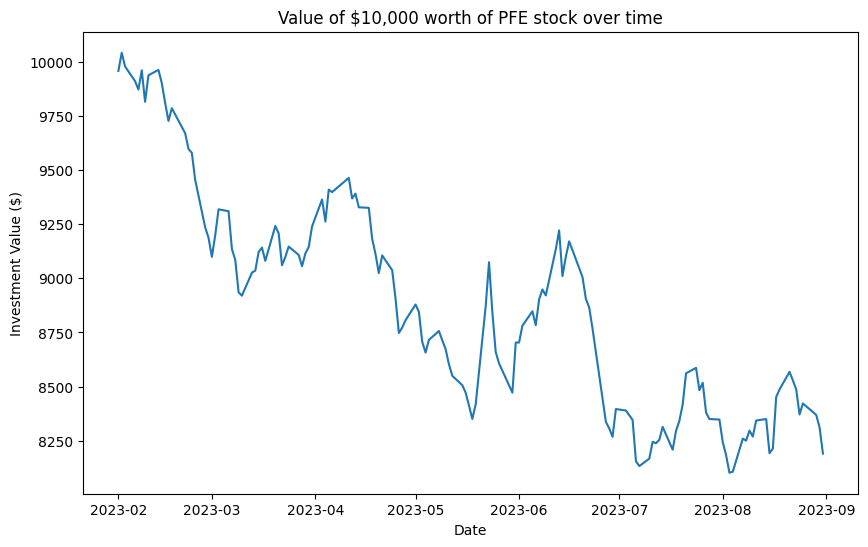

In [100]:
# Plotting the line chart and name it as required
plt.figure(figsize=(10, 6))
plt.plot(stocks_pfe['date'], stocks_pfe['investment_value'])
plt.title('Value of $10,000 worth of PFE stock over time')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.show()

In [46]:
import plotly.express as px

In [101]:
# Plotting the interactive line chart using Plotly
fig = px.line(stocks_pfe, x='date', y='investment_value', 
              title='Value of $10,000 worth of PFE stock over time',
              labels={'date': 'Date', 'investment_value': 'Investment Value ($)'})

# Show the plot
fig.show()

**BONUS**

In [103]:
def preprocess_data(stocks, start_date, end_date, ticker):
    """
    Preprocess the stock data by filtering based on date and ticker, 
    and converting the 'RET' column to numeric.
    """
    stocks_filtered = stocks[(stocks['date'] >= start_date) & (stocks['date'] <= end_date)]
    stocks_filtered = stocks_filtered[stocks_filtered['TICKER'] == ticker]
    stocks_filtered['RET'] = pd.to_numeric(stocks_filtered['RET'], errors='coerce')
    stocks_filtered = stocks_filtered.dropna(subset=['RET'])
    return stocks_filtered

def calculate_investment_value(stocks, initial_investment):
    """
    Calculate the investment value over time.
    """
    stocks['investment_value'] = initial_investment * (1 + stocks['RET']).cumprod()
    return stocks

def plot_investment_value(stocks, ticker, initial_investment):
    """
    Plot the investment value over time using Plotly.
    """
    fig = px.line(stocks, x='date', y='investment_value', 
                  title=f'Value of ${initial_investment} worth of {ticker} stock over time',
                  labels={'date': 'Date', 'investment_value': 'Investment Value ($)'})
    fig.show()

def main(stocks, initial_investment, start_date, end_date, ticker):
    """
    Main function to process data and plot the investment value.
    """
    stocks_filtered = preprocess_data(stocks, start_date, end_date, ticker)
    stocks_with_investment_value = calculate_investment_value(stocks_filtered, initial_investment)
    plot_investment_value(stocks_with_investment_value, ticker, initial_investment)


In [105]:
# Parameter
initial_investment = 10000
start_date = '2023-02-01'
end_date = '2023-08-31'
ticker = 'AMZN'

# Assuming 'stocks' is your DataFrame containing the stock data
main(stocks, initial_investment, start_date, end_date, ticker)

**QUESTION 3**

In [26]:
# Assuming the questions are unrelated, except the initial investment is $10,000
# Read data file and convert date to standard format
stocks2 = pd.read_csv('/Users/haivanle/Documents/2024 Empirical/stocks_Jan-Nov2023.csv')
stocks2['date'] = pd.to_datetime(stocks2['date'], errors = 'coerce')
# Filter dates from May 1 - Nov 30, 2023
stocks2 = stocks2[(stocks2['date'] >= '2023-05-01') & (stocks2['date'] <= '2023-11-30')]

/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_90394/3821529557.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  stocks2 = pd.read_csv('/Users/haivanle/Documents/2024 Empirical/stocks_Jan-Nov2023.csv')


In [27]:
stocks2['COMNAM'].describe()

count                         759274
unique                          5390
top       LIBERTY MEDIA CORP 3RD NEW
freq                            1021
Name: COMNAM, dtype: object

In [28]:
stocks2.dtypes

date      datetime64[ns]
TICKER            object
COMNAM            object
PRC              float64
VOL              float64
RET               object
SHROUT           float64
dtype: object

In [29]:
# Convert stocks return from object to float type
# Ran into some errors since not all RET data are numbers so let's drop those. astype(float) won't work for string so 
# I used to_numeric
stocks2['RET'] = pd.to_numeric(stocks2['RET'], errors='coerce')
stocks2 = stocks2.dropna(subset=['RET'])

In [30]:
stocks2

,date,TICKER,COMNAM,PRC,VOL,RET,SHROUT
81,2023-05-01,JJSF,J & J SNACK FOODS CORP,154.78000,125206.0,0.010313,19252.0
82,2023-05-02,JJSF,J & J SNACK FOODS CORP,158.16000,104440.0,0.021837,19252.0
83,2023-05-03,JJSF,J & J SNACK FOODS CORP,156.25999,79906.0,-0.012013,19252.0
84,2023-05-04,JJSF,J & J SNACK FOODS CORP,158.77000,71960.0,0.016063,19252.0
85,2023-05-05,JJSF,J & J SNACK FOODS CORP,162.80000,66716.0,0.025383,19252.0
...,...,...,...,...,...,...,...
1184193,2023-11-24,TSLA,TESLA INC,235.45000,64790526.0,0.005294,3179000.0
1184194,2023-11-27,TSLA,TESLA INC,236.08000,111514924.0,0.002676,3179000.0
1184195,2023-11-28,TSLA,TESLA INC,246.72000,147518559.0,0.045069,3179000.0
1184196,2023-11-29,TSLA,TESLA INC,244.14000,134917402.0,-0.010457,3179000.0


In [31]:
# Create a dictionary to store cumulative returns for each company
cumulative_returns_dict = {}

for ticker in stocks2['TICKER'].unique():
    # Filter the dataset for each company
    company_data = stocks2[stocks2['TICKER'] == ticker].copy()
    
    # Calculate cumulative returns and create a new column
    company_data['investment_value'] = initial_investment * (1 + company_data['RET']).cumprod()
    
    # Store the result in the dictionary
    cumulative_returns_dict[ticker] = company_data[['date', 'TICKER', 'investment_value']]

# Concatenate the results into a new DataFrame
cumulative_returns_df = pd.concat(cumulative_returns_dict.values())

In [32]:
cumulative_returns_df.head()

,date,TICKER,investment_value
81,2023-05-01,JJSF,10103.130000
82,2023-05-02,JJSF,10323.752050
83,2023-05-03,JJSF,10199.732816
84,2023-05-04,JJSF,10363.571125
85,2023-05-05,JJSF,10626.629651


**QUESTION 4**

In [34]:
footnote = pd.read_csv('/Users/haivanle/Documents/2024 Empirical/footnotes.csv')
footnote.head()

,filename,accession_num,footnote,index,field,text
0,1929335_2_0000899243-23-016238.txt,0000899243-23-016238,F1,derivTrans1,exerciseDate,The option will vest and become exercisable at...
1,1124105_4_0001140361-23-050019.txt,0001140361-23-050019,F1,nonDerivTrans1,transactionCoding,Represents an internal transfer by the Reporti...
2,1124105_4_0001140361-23-050019.txt,0001140361-23-050019,F1,nonDerivTrans1,transactionPricePerShare,Represents an internal transfer by the Reporti...
3,1124105_4_0001140361-23-050019.txt,0001140361-23-050019,F2,derivTrans1,conversionOrExercisePrice,Shares of Series X Convertible Preferred Stock...
4,1124105_4_0001140361-23-050019.txt,0001140361-23-050019,F1,derivTrans1,transactionCoding,Represents an internal transfer by the Reporti...


In [35]:
footnote.describe()

,filename,accession_num,footnote,index,field,text
count,1746554,1746554,1746554,1746554,1746554,1734910
unique,330492,158222,41,117,19,157366
top,1601463_1_0000899243-23-009615.txt,0000899243-23-009615,F1,nonDerivTrans1,exerciseDate,Restricted stock units convert into common sto...
freq,338,2704,612944,404647,263827,5280


In [36]:
footnote = footnote.drop_duplicates()
footnote.describe()

,filename,accession_num,footnote,index,field,text
count,1746554,1746554,1746554,1746554,1746554,1734910
unique,330492,158222,41,117,19,157366
top,1601463_1_0000899243-23-009615.txt,0000899243-23-009615,F1,nonDerivTrans1,exerciseDate,Restricted stock units convert into common sto...
freq,338,2704,612944,404647,263827,5280


In [39]:
# Read the csv file and view a few rows
trades2 = pd.read_csv('/Users/haivanle/Documents/2024 Empirical/trades.csv')
trades2 = trades2.drop_duplicates()
trades2.describe()

,order,price,shares,shares_owned,CIK
count,348271.000000,2.507070e+05,2.707650e+05,3.481880e+05,3.482710e+05
mean,2.395755,5.136221e+02,3.104011e+05,4.754228e+06,1.157756e+06
std,2.880249,8.749722e+04,2.356394e+07,9.847200e+07,5.526566e+05
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.750000e+03
25%,1.000000,0.000000e+00,7.220000e+02,1.110000e+04,8.607300e+05
50%,1.000000,1.229000e+01,3.069000e+03,5.112400e+04,1.273685e+06
75%,3.000000,5.692000e+01,1.395300e+04,2.503385e+05,1.620393e+06
max,30.000000,2.950000e+07,8.456000e+09,8.985000e+09,1.996862e+06


In [40]:
# I may have misunderstood this question. What I did is I created a dummy variable for the transaction whose accession_num
# also exists in the footnote.csv dataset. Using isin, instead of giving me T/F values, I used astype int so the dummy == 1 
# if the accession_num exists in both trades and footnote dataset. Otherwise, 0.   
trades2['dummy'] = trades2['accession_num'].isin(footnote['accession_num']).astype(int)
trades2.head()

,accession_num,order,trans_date,trans_type,price,shares,shares_owned,CIK,name,ticker,dummy
0,0001140361-23-050019,1,10/27/2023,D,NaN,5371304.0,0.0,1124105,"CATALYST BIOSCIENCES, INC.",CBIO,1
1,0000885550-23-000118,1,11/14/2023,D,418.04,115.0,6173.0,885550,CREDIT ACCEPTANCE CORP,CACC,1
2,0000885550-23-000118,2,11/14/2023,D,419.62,100.0,6073.0,885550,CREDIT ACCEPTANCE CORP,CACC,1
3,0000885550-23-000118,3,11/14/2023,D,420.72,2240.0,3833.0,885550,CREDIT ACCEPTANCE CORP,CACC,1
4,0000885550-23-000118,4,11/14/2023,D,421.38,459.0,3374.0,885550,CREDIT ACCEPTANCE CORP,CACC,1


In [41]:
trades2['dummy'].mean()

0.9057572981959451

In [42]:
# I changed the dummy values, 0 to 1 and vice versa so it matched with the requirement "equals 1 if and only if the transaction was pursuant to a 10(b)5-1 plan".
# Why I did this? My understanding is that the footnote from SEC contains all the illegal transactions.
trades2['dummy'] = np.where(trades2["dummy"] == 1, 0, 1)
trades2.head()

,accession_num,order,trans_date,trans_type,price,shares,shares_owned,CIK,name,ticker,dummy
0,0001140361-23-050019,1,10/27/2023,D,NaN,5371304.0,0.0,1124105,"CATALYST BIOSCIENCES, INC.",CBIO,0
1,0000885550-23-000118,1,11/14/2023,D,418.04,115.0,6173.0,885550,CREDIT ACCEPTANCE CORP,CACC,0
2,0000885550-23-000118,2,11/14/2023,D,419.62,100.0,6073.0,885550,CREDIT ACCEPTANCE CORP,CACC,0
3,0000885550-23-000118,3,11/14/2023,D,420.72,2240.0,3833.0,885550,CREDIT ACCEPTANCE CORP,CACC,0
4,0000885550-23-000118,4,11/14/2023,D,421.38,459.0,3374.0,885550,CREDIT ACCEPTANCE CORP,CACC,0


In [43]:
trades2['dummy'].mean()

0.09424270180405489

In [44]:
trades2['trans_date'] = pd.to_datetime(trades2['trans_date'], errors = 'coerce')
trades2 = trades2[(trades2['trans_date'] >= '2023-01-01') & (trades2['trans_date'] <= '2023-04-30')]

In [45]:
print("Number of transactions that were pursuant to 10(b)5-1: ", sum(trades2.dummy == 1)) 

Number of transactions that were pursuant to 10(b)5-1:  9234
